In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [26]:
N=20
X=np.random.random(N)*10 - 5
Y=0.5*X -1 + np.random.random(N)

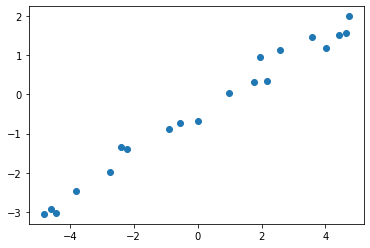

In [27]:
plt.scatter(X,Y)

In [30]:
# Building the model
# We define a model : Linear here

model=nn.Linear(1,1) # 1 input and 1 output

# Loss function and Optimizer 

criterion=nn.MSELoss() # an torch object implementing Mean Sq Error


# Stochastic Gradient Descent with loss rate = 0.1
optimizer= torch.optim.SGD(model.parameters(), lr=0.01)  

# Now the torch lib works with torch tensors and not np arrays
# Thus we convert our vectors to tensors and then to pytorch tensors
# Also pytorch does not allow to mix data types so it will do calcs
# on float32-float32 or float64-float64 and not on float32-float64

X=X.reshape(N,1)
Y=Y.reshape(N,1)

inputs=torch.from_numpy(X.astype(np.float32))
targets=torch.from_numpy(Y.astype(np.float32))


In [31]:
np.shape(X)

(20, 1)

In [32]:
# Training the model

epochs=30
# we will store the losses to check is the coverge and plot them
losses=[]

for _ in range(epochs):
  # Zero the parameter gradients (Just do this as 1st step)
  optimizer.zero_grad()

  # Forward Pass: get the outputs and calculate loss
  outputs=model(inputs)
  loss=criterion(outputs,targets) #you can build this yourself (Just MSE)

  # Append los: use torch's item() to convert from torch to np
  losses.append(loss.item())

  # Backward and optimize
  loss.backward()
  optimizer.step() # geometrically moving our values to gradient descent

  print(f'Epoch: {_+1}/{epochs}, Loss: {loss.item(): .4f}')


Epoch: 1/30, Loss:  1.1356
Epoch: 2/30, Loss:  0.7290
Epoch: 3/30, Loss:  0.4749
Epoch: 4/30, Loss:  0.3162
Epoch: 5/30, Loss:  0.2169
Epoch: 6/30, Loss:  0.1549
Epoch: 7/30, Loss:  0.1161
Epoch: 8/30, Loss:  0.0919
Epoch: 9/30, Loss:  0.0768
Epoch: 10/30, Loss:  0.0673
Epoch: 11/30, Loss:  0.0614
Epoch: 12/30, Loss:  0.0577
Epoch: 13/30, Loss:  0.0554
Epoch: 14/30, Loss:  0.0539
Epoch: 15/30, Loss:  0.0530
Epoch: 16/30, Loss:  0.0525
Epoch: 17/30, Loss:  0.0521
Epoch: 18/30, Loss:  0.0519
Epoch: 19/30, Loss:  0.0518
Epoch: 20/30, Loss:  0.0517
Epoch: 21/30, Loss:  0.0516
Epoch: 22/30, Loss:  0.0516
Epoch: 23/30, Loss:  0.0516
Epoch: 24/30, Loss:  0.0516
Epoch: 25/30, Loss:  0.0515
Epoch: 26/30, Loss:  0.0515
Epoch: 27/30, Loss:  0.0515
Epoch: 28/30, Loss:  0.0515
Epoch: 29/30, Loss:  0.0515
Epoch: 30/30, Loss:  0.0515


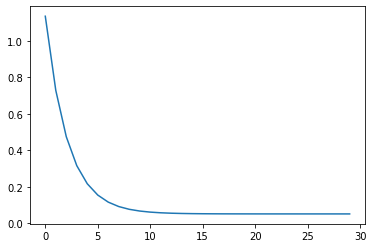

In [33]:
plt.plot(losses)

In [34]:
print(model.weight.data.numpy())

[[0.50385714]]


In [40]:
print(model.bias.data)


tensor([-0.5039])


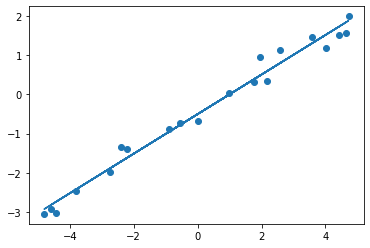

In [38]:
predictions=model(inputs).detach().numpy()
plt.scatter(X,Y)
plt.plot(X,predictions)